In [18]:
pip install scikit-fuzzy

In [19]:
from re import L
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
product_demand = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'product_demand')
competitor_pricing_pressure = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'competitor_pricing_pressure')
store_reputation = ctrl.Antecedent(np.arange(0, 6.1, 0.1), 'store_reputation')
profit_margin = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'profit_margin')
seasonal_demand = ctrl.Antecedent(np.arange(0, 4.1, 0.1), 'seasonal_demand')
discount = ctrl.Consequent(np.arange(0, 70.1, 1), 'discount')

product_demand['low'] = fuzz.trimf(product_demand.universe, [0, 0, 5])
product_demand['medium'] = fuzz.trimf(product_demand.universe, [4, 6, 8])
product_demand['high'] = fuzz.trimf(product_demand.universe, [7, 10, 10])

competitor_pricing_pressure['low'] = fuzz.trimf(competitor_pricing_pressure.universe, [0, 0, 5])
competitor_pricing_pressure['medium'] = fuzz.trimf(competitor_pricing_pressure.universe, [4, 6, 8])
competitor_pricing_pressure['high'] = fuzz.trimf(competitor_pricing_pressure.universe, [7, 9, 10])

store_reputation['low'] = fuzz.trimf(store_reputation.universe, [0, 0, 4])
store_reputation['medium'] = fuzz.trimf(store_reputation.universe, [3.9, 4.2, 4.6])
store_reputation['high'] = fuzz.trimf(store_reputation.universe, [4.5, 5, 5])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 5])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [4, 6, 8])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [7, 10, 10])

seasonal_demand['none'] = fuzz.trimf(seasonal_demand.universe, [0, 0, 1])
seasonal_demand['moderate'] = fuzz.trimf(seasonal_demand.universe, [1, 2, 3])
seasonal_demand['high'] = fuzz.trimf(seasonal_demand.universe, [2, 3, 4])

discount['very_low'] = fuzz.trimf(discount.universe, [0, 0, 6])
discount['low'] = fuzz.trimf(discount.universe, [5, 8, 11])
discount['medium'] = fuzz.trimf(discount.universe, [10, 15, 21])
discount['high'] = fuzz.trimf(discount.universe, [20, 25, 41])
discount['very_high'] = fuzz.trimf(discount.universe, [40, 60, 70])

In [25]:

rules = [
    ctrl.Rule(product_demand['high'] & competitor_pricing_pressure['low'] & profit_margin['low'], discount['very_low']),
    ctrl.Rule(product_demand['low'] & competitor_pricing_pressure['high'] & profit_margin['high'], discount['high']),
    ctrl.Rule(store_reputation['high'] & profit_margin['medium'] & seasonal_demand['high'], discount['medium']),
    ctrl.Rule(competitor_pricing_pressure['high'] & seasonal_demand['high'] & profit_margin['high'], discount['very_high']),
    ctrl.Rule(store_reputation['low'] & product_demand['medium'] & profit_margin['low'], discount['medium']),
    ctrl.Rule(product_demand['high'] & seasonal_demand['none'] & competitor_pricing_pressure['low'], discount['very_low']),
    ctrl.Rule(profit_margin['high'] & competitor_pricing_pressure['medium'] & seasonal_demand['moderate'], discount['medium']),
    ctrl.Rule(store_reputation['medium'] & product_demand['high'] & profit_margin['high'] & competitor_pricing_pressure['medium'] & seasonal_demand['high'], discount['medium']),
]

Mức giảm giá: 15.42222222222222


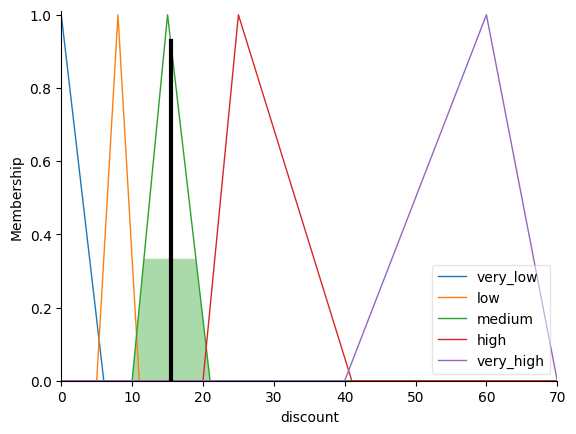

In [26]:
fuzzy_control = ctrl.ControlSystem(rules)
discount_control = ctrl.ControlSystemSimulation(fuzzy_control)
discount_control.input['product_demand'] = 9
discount_control.input['competitor_pricing_pressure'] = 5.5
discount_control.input['store_reputation'] = 4.2
discount_control.input['profit_margin'] = 8
discount_control.input['seasonal_demand'] = 3
discount_control.compute()
discount.view(discount_control)
print(f"Mức giảm giá: {discount_control.output['discount']}")